<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span><ul class="toc-item"><li><span><a href="#график-«Модели-самолётов-и-количество-рейсов»" data-toc-modified-id="график-«Модели-самолётов-и-количество-рейсов»-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>график «Модели самолётов и количество рейсов»</a></span></li><li><span><a href="#график-«Города-и-количество-рейсов»" data-toc-modified-id="график-«Города-и-количество-рейсов»-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>график «Города и количество рейсов»</a></span></li><li><span><a href="#топ-10-городов-по-количеству-рейсов" data-toc-modified-id="топ-10-городов-по-количеству-рейсов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>топ-10 городов по количеству рейсов</a></span></li><li><span><a href="#график-«Топ-10-городов-и-количество-рейсов»" data-toc-modified-id="график-«Топ-10-городов-и-количество-рейсов»-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>график «Топ-10 городов и количество рейсов»</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
path = 'C:/Users/Mikhail/оформление/SQL/'
try:
    df_1 = pd.read_csv(path + 'query_1.csv')
    df_3 = pd.read_csv(path + 'query_3.csv')
except:
    df_1 = pd.read_csv('/datasets/query_1.csv')
    df_3 = pd.read_csv('/datasets/query_3.csv')

In [3]:
df_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
df_3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [5]:
def info_stat(data):
    return data.info(), data.describe()

In [6]:
def miss_sorted(data):
    report = data.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
    print(report.sort_values(by = 'missing_values', ascending = False))

In [7]:
miss_sorted(df_1)

                missing_values  % of total
model                        0         0.0
flights_amount               0         0.0


In [8]:
miss_sorted(df_3)

                 missing_values  % of total
city                          0         0.0
average_flights               0         0.0


In [11]:
info_stat(df_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


(None,
        flights_amount
 count        8.000000
 mean      2035.625000
 std       1965.203947
 min        300.000000
 25%        605.250000
 50%        795.000000
 75%       4250.250000
 max       4557.000000)

In [12]:
info_stat(df_3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


(None,
        average_flights
 count       101.000000
 mean          5.494189
 std          13.119790
 min           1.000000
 25%           2.000000
 50%           3.000000
 75%           5.870968
 max         129.774194)

1. Все данные в порядке, название городов и моделей - строки, численные значения имеют численный формат.
2. Нет пропусков, нет нулевых значений

### график «Модели самолётов и количество рейсов»

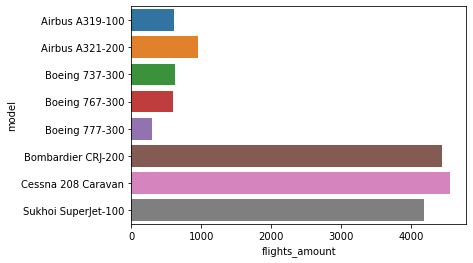

In [13]:
ax = sns.barplot(x="flights_amount", y="model", data=df_1)

1. Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100 - это самолеты малой дальности для межрегиональных перелетов, большое количество полетов обусловленно их короткой дистанции для миграционных процессов между субъектами РФ
2. Airbus и Boeing являются суднами средне-дальних перелетов, что обуславливает малое число их перелетов, это либо перелеты с одного конца страны в другой, или международные перелеты большой дальности.

### график «Города и количество рейсов»

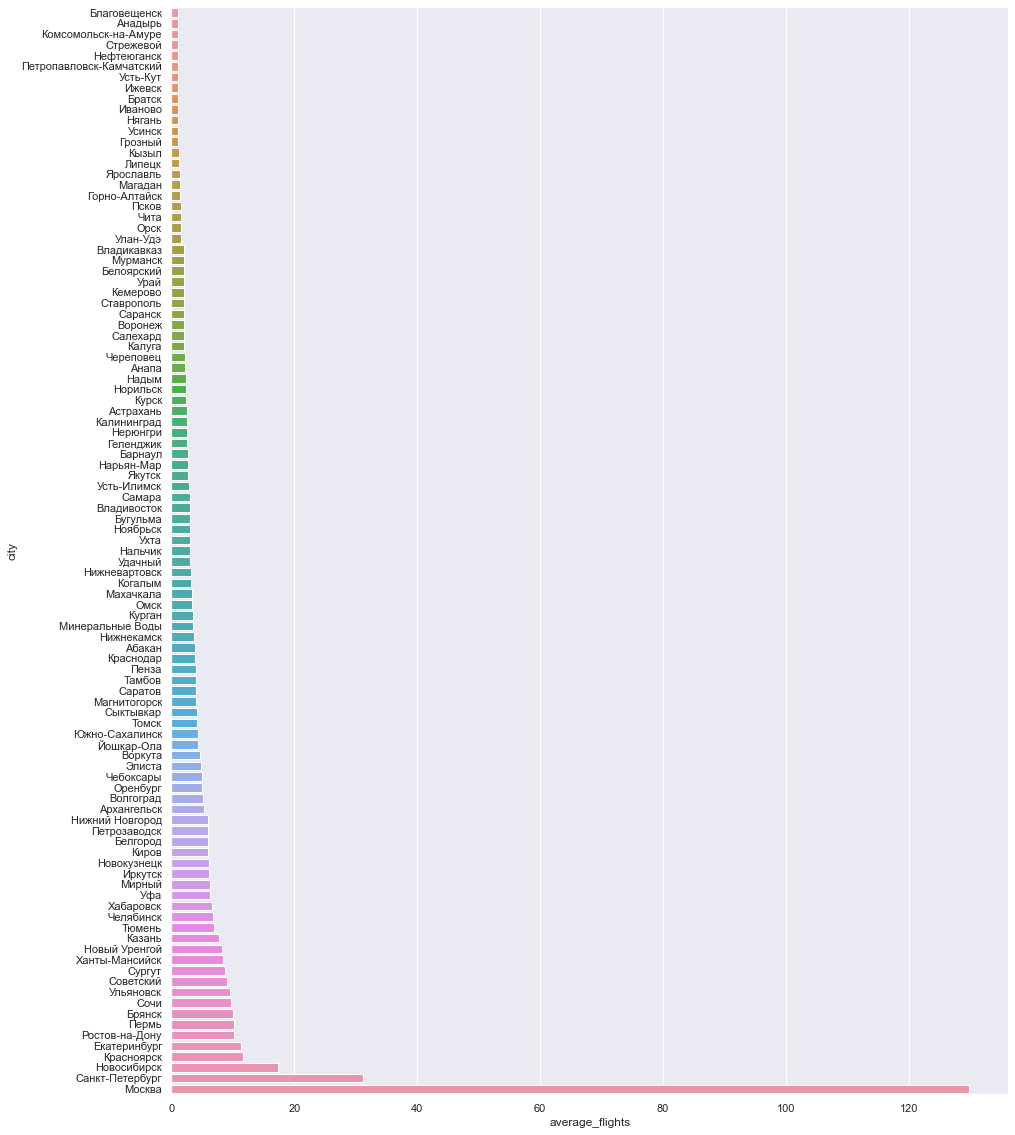

In [17]:
sns.set(rc={'figure.figsize':(15.0, 20.0)})
ax = sns.barplot(x="average_flights", y="city", data=df_3.sort_values(by='average_flights'))

1. Крупные города имеют большее число авиаперелетов
2. Некоторые города имеют большее число авиаперелетов за счет туризма или промышленности
3. Есть интересные города, например Хабаровск имеет большее число перелетов, чем соседний Владивосток, хотя последний является и административным центром, и туристическим городом.

### топ-10 городов по количеству рейсов

In [18]:
df_top = df_3.sort_values(by='average_flights', ascending = False)[:10]
df_top = df_top.reset_index(drop=True)
df_top

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


### график «Топ-10 городов и количество рейсов»

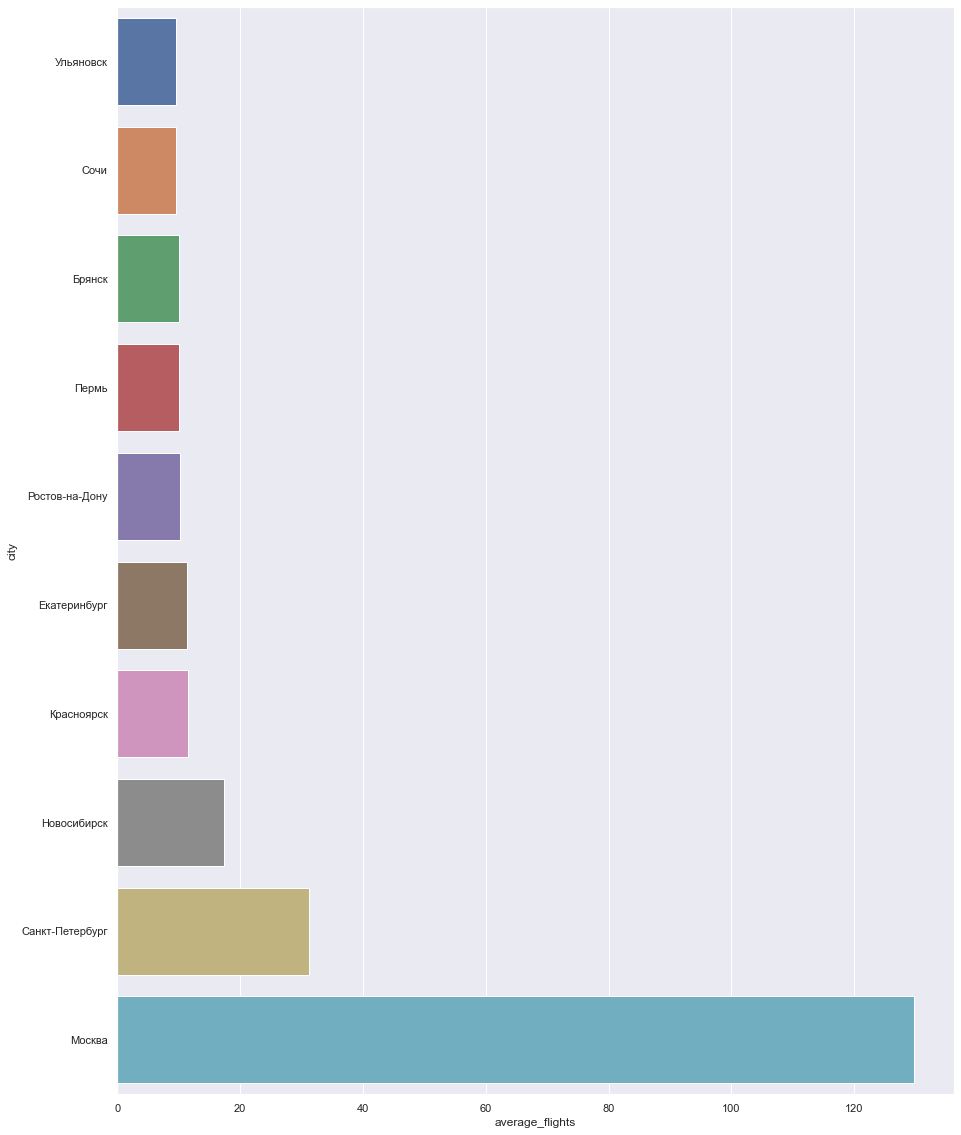

In [19]:
ax = sns.barplot(x="average_flights", y="city", data=df_top.sort_values(by='average_flights'))

1. 7 из 10 городов являются городами миллиониками, что обуславливает большое число авиаперелетов.
2. Сочи является крупным курортной зоной
3. Ульяновск и Брянс являются крупными промышленными центрами, для Брянска основная отрасль промышленности - металлообработка, а для Ульяновска отрасль - автомобилестроения, моторостроения, авиастроения, приборостроения, машиностроения и металлообработки.

## Вывод

1. Города имеющие больше всего авиаперелетов объясняются своим размером населения, отдельного изучения стоят города, не являющиеся миллиониками, необходимо изучение влияет ли туризм\промышленность на число авиаперевозок в целом.
2. Большая часть перелетов явлется перелетами малой дальности между регионами, оставшиеся перелеты приходятся на средне-дальние дистанции и скорее всего связывают крайние точки страны или дальние международные перелеты.